In [1]:
from kan import *
torch.set_default_dtype(torch.float64)


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

# create a KAN: 2D inputs, 1D output, and 5 hidden neurons. cubic spline (k=3), 5 grid intervals (grid=5).
model = KAN(width=[2,5,1], grid=3, k=3, seed=42).to(device) 

cuda
checkpoint directory created: ./model
saving model version 0.0


In [2]:
from kan.utils import create_dataset
# create dataset f(x,y) = exp(sin(pi*x)+y^2)
f = lambda x: torch.exp(torch.sin(torch.pi*x[:,[0]]) + x[:,[1]]**2)
dataset = create_dataset(f, n_var=2, device=device)
# dataset['train_input'].shape, dataset['train_label'].shape


torch.Size([1000, 2])


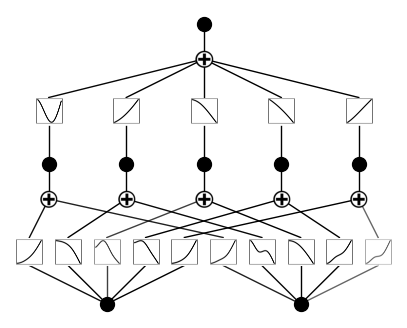

In [3]:
# plot KAN at initialization
print(dataset['train_input'].shape)
model(dataset['train_input']);
model.plot()

In [4]:
# train the model
model.fit(dataset, opt="LBFGS", steps=50, lamb=0.001);

| train_loss: 1.86e-02 | test_loss: 1.79e-02 | reg: 5.71e+00 | : 100%|█| 50/50 [00:06<00:00,  8.20it

saving model version 0.1


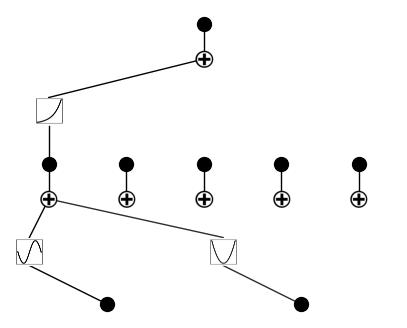

In [5]:
model.plot()

Prune KAN and replot

saving model version 0.2


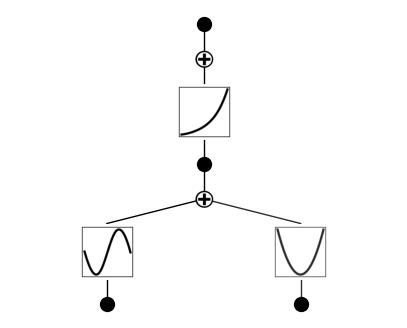

In [6]:
model = model.prune()
model.plot()

Continue trianing and replot

In [7]:
model.fit(dataset, opt="LBFGS", steps=50);

| train_loss: 1.77e-02 | test_loss: 1.70e-02 | reg: 8.26e+00 | : 100%|█| 50/50 [00:03<00:00, 12.79it


saving model version 0.3


In [8]:
model = model.refine(10)

saving model version 0.4


In [9]:
model.fit(dataset, opt="LBFGS", steps=50);

| train_loss: 4.63e-04 | test_loss: 4.70e-04 | reg: 8.27e+00 | : 100%|█| 50/50 [00:03<00:00, 12.80it


saving model version 0.5


Automatically or manually set activation functions to be symbolic

In [10]:
mode = "auto" # "manual"

if mode == "manual":
    # manual mode
    model.fix_symbolic(0,0,0,'sin');
    model.fix_symbolic(0,1,0,'x^2');
    model.fix_symbolic(1,0,0,'exp');
elif mode == "auto":
    # automatic mode
    lib = ['x','x^2','x^3','x^4','exp','log','sqrt','tanh','sin','abs']
    model.auto_symbolic(lib=lib)

fixing (0,0,0) with sin, r2=0.9999999193818642, c=2
fixing (0,1,0) with x^2, r2=0.9999999828155078, c=2
fixing (1,0,0) with exp, r2=0.9999999913030193, c=2
saving model version 0.6


COntinue training till machine precision

In [11]:
model.fit(dataset, opt="LBFGS", steps=50);

| train_loss: 6.93e-13 | test_loss: 6.29e-13 | reg: 0.00e+00 | : 100%|█| 50/50 [00:01<00:00, 33.65it


saving model version 0.7


Obtain symbolic formula

In [12]:
from kan.utils import ex_round

ex_round(model.symbolic_formula()[0][0],4)

1.0*exp(1.0*x_2**2 + 1.0*sin(3.1416*x_1))

In [13]:
x_test = torch.tensor([[1.0, 1.0]], device=device)

# Perform inference
y_pred = model(x_test)


/home/vishnutejas/Desktop/Submission_video/.venv/lib/python3.10/site-packages/kan/MultKAN.py:813: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at /pytorch/aten/src/ATen/native/ReduceOps.cpp:1831.)
  self.subnode_actscale.append(torch.std(x, dim=0).detach())
/home/vishnutejas/Desktop/Submission_video/.venv/lib/python3.10/site-packages/kan/MultKAN.py:823: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at /pytorch/aten/src/ATen/native/ReduceOps.cpp:1831.)
  input_range = torch.std(preacts, dim=0) + 0.1
/home/vishnutejas/Desktop/Submission_video/.venv/lib/python3.10/site-packages/kan/MultKAN.py:824: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (

In [14]:
print("KAN Output:", y_pred.item())
print("actual output:", f(x_test).item()) 

KAN Output: 2.7182818284574584
actual output: 2.718281828459046
